# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame(cities)
cities_df.rename(columns={0:"Cities"}, inplace = True)
cities_df

,Cities
0,teya
1,korla
2,aklavik
3,attawapiskat
4,ribeira grande
...,...
621,itacoatiara
622,laguna
623,nuuk
624,del rio


In [3]:
# cities_df["Cloudiness"] = ""
# cities_df["Country"] = ""
# cities_df["Date"] = ""
# cities_df["Humidity"]=""
# cities_df["Lat"]=""
# cities_df["Lng"]=""
# cities_df["Max Temperature (F)"]=""
# cities_df["Wind Speed (mph)"]=""
# cities_df.head(10)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for index, row in cities_df.iterrows():

    cities_df.loc[cities_df.index, "Cities"]


# API Request below has been proven successful
    weather_url = "http://api.openweathermap.org/data/2.5/weather?q="+cities[index]+"&units=imperial&appid="+weather_api_key
    data_wea = requests.get(weather_url)
    response = data_wea.json()
#     print(response)
#     print(json.dumps(response, indent = 4))
    try:
        cities_df.loc[index,"Forecast"] = response["weather"][0]["main"]
        cities_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        cities_df.loc[index,"Country"] = response["sys"]["country"]
        cities_df.loc[index,"Date"] = datetime.fromtimestamp(response["dt"])
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Lat"] = response["coord"]["lat"]
        cities_df.loc[index,"Lng"] = response["coord"]["lon"]
        cities_df.loc[index,"Max Temperature (F)"] = response["main"]["temp_max"]
        cities_df.loc[index,"Wind Speed (mph)"]=response["wind"]["speed"]

    except KeyError:
        print(f"Retrieving Results for Index {index}: {cities[index]}.")
    print(f"Retrieving Results for Index {index}: {cities[index]}.")

Retrieving Results for Index 0: teya.
Retrieving Results for Index 1: korla.
Retrieving Results for Index 2: aklavik.
Retrieving Results for Index 3: attawapiskat.
Retrieving Results for Index 3: attawapiskat.
Retrieving Results for Index 4: ribeira grande.
Retrieving Results for Index 5: kodiak.
Retrieving Results for Index 6: tsihombe.
Retrieving Results for Index 6: tsihombe.
Retrieving Results for Index 7: mataura.
Retrieving Results for Index 8: grand river south east.
Retrieving Results for Index 8: grand river south east.
Retrieving Results for Index 9: hermanus.
Retrieving Results for Index 10: amderma.
Retrieving Results for Index 10: amderma.
Retrieving Results for Index 11: plettenberg bay.
Retrieving Results for Index 12: jamestown.
Retrieving Results for Index 13: nabire.
Retrieving Results for Index 14: desaguadero.
Retrieving Results for Index 15: ushuaia.
Retrieving Results for Index 16: dunedin.
Retrieving Results for Index 17: mantua.
Retrieving Results for Index 18: 

Retrieving Results for Index 168: sistranda.
Retrieving Results for Index 169: sorvag.
Retrieving Results for Index 169: sorvag.
Retrieving Results for Index 170: charters towers.
Retrieving Results for Index 171: barawe.
Retrieving Results for Index 171: barawe.
Retrieving Results for Index 172: praia.
Retrieving Results for Index 173: estelle.
Retrieving Results for Index 174: lavrentiya.
Retrieving Results for Index 175: kapra.
Retrieving Results for Index 176: bethel.
Retrieving Results for Index 177: tupik.
Retrieving Results for Index 178: edgewater.
Retrieving Results for Index 179: verkhoyansk.
Retrieving Results for Index 180: krasnyy chikoy.
Retrieving Results for Index 181: bay roberts.
Retrieving Results for Index 182: mayor pablo lagerenza.
Retrieving Results for Index 183: koungou.
Retrieving Results for Index 184: ust-ilimsk.
Retrieving Results for Index 185: itoman.
Retrieving Results for Index 186: pisco.
Retrieving Results for Index 187: half moon bay.
Retrieving Resu

Retrieving Results for Index 345: kidal.
Retrieving Results for Index 346: talnakh.
Retrieving Results for Index 347: gat.
Retrieving Results for Index 348: san patricio.
Retrieving Results for Index 349: necochea.
Retrieving Results for Index 350: macaubas.
Retrieving Results for Index 351: bucsa.
Retrieving Results for Index 352: khatanga.
Retrieving Results for Index 353: rajbiraj.
Retrieving Results for Index 354: inhambane.
Retrieving Results for Index 355: ust-uda.
Retrieving Results for Index 356: pueblo nuevo.
Retrieving Results for Index 357: kailua.
Retrieving Results for Index 358: fengrun.
Retrieving Results for Index 359: baruun-urt.
Retrieving Results for Index 360: clyde river.
Retrieving Results for Index 361: ust-kamchatsk.
Retrieving Results for Index 361: ust-kamchatsk.
Retrieving Results for Index 362: djambala.
Retrieving Results for Index 363: caravelas.
Retrieving Results for Index 364: baykit.
Retrieving Results for Index 365: kavieng.
Retrieving Results for Ind

Retrieving Results for Index 520: henties bay.
Retrieving Results for Index 521: palmer.
Retrieving Results for Index 522: camocim.
Retrieving Results for Index 523: chanute.
Retrieving Results for Index 524: ancud.
Retrieving Results for Index 525: dracsenei.
Retrieving Results for Index 525: dracsenei.
Retrieving Results for Index 526: ketchikan.
Retrieving Results for Index 527: san cristobal.
Retrieving Results for Index 528: hoi an.
Retrieving Results for Index 529: jardim.
Retrieving Results for Index 530: sol-iletsk.
Retrieving Results for Index 531: padilla.
Retrieving Results for Index 532: ardino.
Retrieving Results for Index 533: san jose.
Retrieving Results for Index 534: tekeli.
Retrieving Results for Index 535: dawei.
Retrieving Results for Index 536: santa isabel do rio negro.
Retrieving Results for Index 537: neiafu.
Retrieving Results for Index 538: amahai.
Retrieving Results for Index 539: yugo-kamskiy.
Retrieving Results for Index 540: aleksandrov gay.
Retrieving Res

In [5]:
cities_df

,Cities,Forecast,Cloudiness (%),Country,Date,Humidity,Lat,Lng,Max Temperature (F),Wind Speed (mph)
0,teya,Clear,1.0,RU,2020-04-11 13:13:17,94.0,60.38,92.63,24.39,4.03
1,korla,Clouds,17.0,CN,2020-04-11 13:14:43,21.0,41.76,86.15,58.80,3.67
2,aklavik,Clouds,20.0,CA,2020-04-11 13:10:37,84.0,68.22,-135.01,5.00,4.70
3,attawapiskat,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,ribeira grande,Clouds,20.0,PT,2020-04-11 13:14:43,77.0,38.52,-28.70,64.40,4.70
...,...,...,...,...,...,...,...,...,...,...
621,itacoatiara,Rain,100.0,BR,2020-04-11 13:15:58,95.0,-3.14,-58.44,76.30,3.76
622,laguna,Clouds,90.0,US,2020-04-11 13:13:00,82.0,38.42,-121.42,59.00,4.70
623,nuuk,Clouds,99.0,GL,2020-04-11 13:15:59,69.0,64.18,-51.72,39.20,4.70
624,del rio,Clouds,90.0,US,2020-04-11 13:12:23,78.0,29.36,-100.90,73.40,14.99


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.columns
cities_df.to_csv (r'city_weather_dataframe.csv', index = False, header=True)

In [7]:
cities_df

,Cities,Forecast,Cloudiness (%),Country,Date,Humidity,Lat,Lng,Max Temperature (F),Wind Speed (mph)
0,teya,Clear,1.0,RU,2020-04-11 13:13:17,94.0,60.38,92.63,24.39,4.03
1,korla,Clouds,17.0,CN,2020-04-11 13:14:43,21.0,41.76,86.15,58.80,3.67
2,aklavik,Clouds,20.0,CA,2020-04-11 13:10:37,84.0,68.22,-135.01,5.00,4.70
3,attawapiskat,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,ribeira grande,Clouds,20.0,PT,2020-04-11 13:14:43,77.0,38.52,-28.70,64.40,4.70
...,...,...,...,...,...,...,...,...,...,...
621,itacoatiara,Rain,100.0,BR,2020-04-11 13:15:58,95.0,-3.14,-58.44,76.30,3.76
622,laguna,Clouds,90.0,US,2020-04-11 13:13:00,82.0,38.42,-121.42,59.00,4.70
623,nuuk,Clouds,99.0,GL,2020-04-11 13:15:59,69.0,64.18,-51.72,39.20,4.70
624,del rio,Clouds,90.0,US,2020-04-11 13:12:23,78.0,29.36,-100.90,73.40,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

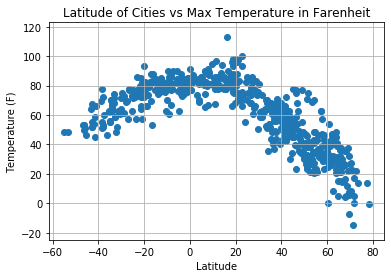

In [8]:
# print(cities_df["Max Temperature (F)"])
# print(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Max Temperature (F)"])
plt.title("Latitude of Cities vs Max Temperature in Farenheit")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(cities_df["Max Temperature (F)"].min() - 10, cities_df["Max Temperature (F)"].max() + 10)
plt.grid(True, which = "major")

In [ ]:
# What we are seeing in this plot is a tendency of Temperature get warmer the closer it is to the equator (latitude = 0). 

#### Latitude vs. Humidity Plot

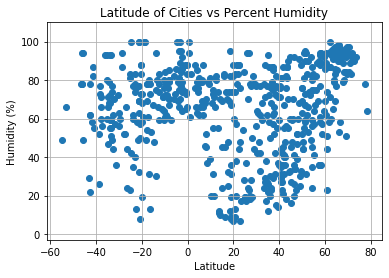

In [9]:
# print(cities_df["Humidity"])
# print(cities_df["Lat"])

plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.title("Latitude of Cities vs Percent Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(cities_df["Humidity"].min() - 10, cities_df["Humidity"].max() + 10)
plt.grid(True, which = "major")

In [ ]:
# If the latitude is closer to 0, then the humidity seems to be higher. The further away from the equator it is, the less reliable or more random the humidity % seems to be. 

#### Latitude vs. Cloudiness Plot

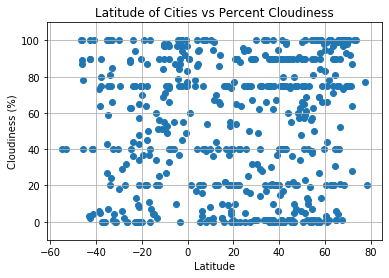

In [10]:
# print(cities_df["Lat"])
# print(cities_df["Cloudiness (%)"])

plt.scatter(cities_df["Lat"], cities_df["Cloudiness (%)"])
plt.title("Latitude of Cities vs Percent Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(cities_df["Cloudiness (%)"].min() - 10, cities_df["Cloudiness (%)"].max() + 10)
plt.grid(True, which = "major")

In [ ]:
# From this plot it seems like there are inconclusive results. The scatter plot seems to be random. 

#### Latitude vs. Wind Speed Plot

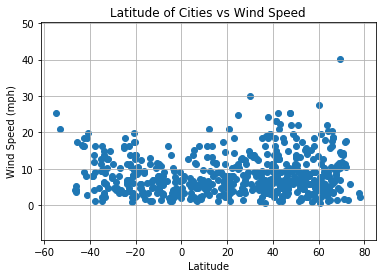

In [11]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed (mph)"])
plt.title("Latitude of Cities vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(cities_df["Wind Speed (mph)"].min() - 10, cities_df["Wind Speed (mph)"].max() + 10)
plt.grid(True, which = "major")

In [ ]:
# In this plot, it seems like wind speeds are low for each of the randomly generated cities. There are a few outliers but there isn't much of a conclusion from this plot. 

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
# Take information from cities_df and transfer to another data frame 

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df= cities_df.loc[cities_df['Lat'] >= 0, :]
southern_df = cities_df.loc[cities_df['Lat'] < 0, :]
# northern_df
# southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

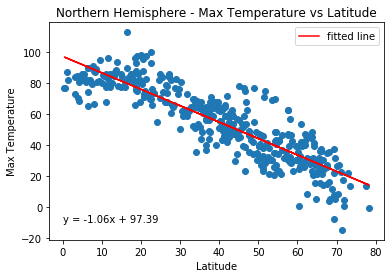

R-squared is 0.763


In [14]:
plt.scatter(northern_df["Lat"], northern_df["Max Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temperature vs Latitude")

slope_n1, intercept_n1, rvalue_n1, pvalue_n1, stderr_n1 = linregress(northern_df["Lat"], northern_df["Max Temperature (F)"])
lin_req_annotate = str(f"y = {round(slope_n1,ndigits=2)}x + {round(intercept_n1,ndigits=2)}")
plt.plot(northern_df["Lat"], intercept_n1 + slope_n1*northern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate, (0,-10))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_n1**2,ndigits = 3)}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

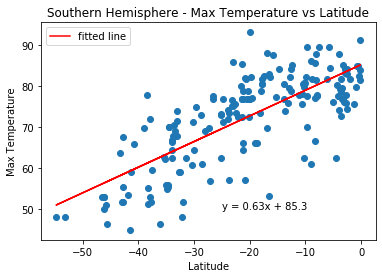

R-squared is 0.57


In [15]:
plt.scatter(southern_df["Lat"], southern_df["Max Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temperature vs Latitude")

slope_s1, intercept_s1, rvalue_s1, pvalue_s1, stderr_s1 = linregress(southern_df["Lat"], southern_df["Max Temperature (F)"])
lin_req_annotate2 = str(f"y = {round(slope_s1, ndigits=2)}x + {round(intercept_s1,ndigits=2)}")
plt.plot(southern_df["Lat"], intercept_s1 + slope_s1*southern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate2, (-25,50))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_s1**2,ndigits = 3)}')

In [ ]:
# The two plots are essentially concluding the same thing. The only reason that there is a positive slope vs a negative slope is because of the nature of the latitude.
# Essentially the closer the latitude gets to 0, the higher the temperature will be.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

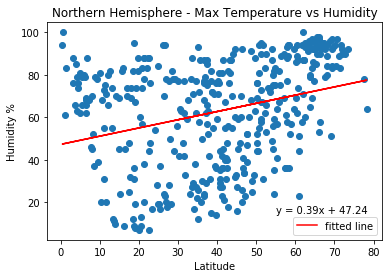

R-squared is 0.089


In [16]:
plt.scatter(northern_df["Lat"], northern_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere - Humidity vs Latitude")

slope_n2, intercept_n2, rvalue_n2, pvalue_n2, stderr_n2 = linregress(northern_df["Lat"], northern_df["Humidity"])
lin_req_annotate3 = str(f"y = {round(slope_n2,ndigits=2)}x + {round(intercept_n2,ndigits=2)}")
plt.plot(northern_df["Lat"], intercept_n2 + slope_n2*northern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate3, (55,15))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_n2**2,ndigits = 3)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

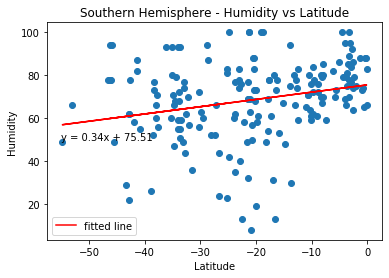

In [17]:
plt.scatter(southern_df["Lat"], southern_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs Latitude")

slope_s2, intercept_s2, rvalue_s2, pvalue_s2, stderr_s2 = linregress(southern_df["Lat"], southern_df["Humidity"])
lin_req_annotate4 = str(f"y = {round(slope_s2, ndigits=2)}x + {round(intercept_s2,ndigits=2)}")
plt.plot(southern_df["Lat"], intercept_s2 + slope_s2*southern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate4, (-55,50))
plt.legend()
plt.show()

In [ ]:
# There are fewer points in the southern hemisphere compared to the northern hemisphere; one would expect that the humidity would be higher as it gets closer to the equator.
# There may be fewer points in the southern hemisphere because there is more land mass in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

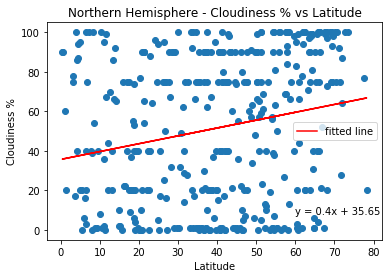

R-squared is 0.044


In [18]:
plt.scatter(northern_df["Lat"], northern_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Northern Hemisphere - Cloudiness % vs Latitude")

slope_n3, intercept_n3, rvalue_n3, pvalue_n3, stderr_n3 = linregress(northern_df["Lat"], northern_df["Cloudiness (%)"])
lin_req_annotate4 = str(f"y = {round(slope_n3,ndigits=2)}x + {round(intercept_n3,ndigits=2)}")
plt.plot(northern_df["Lat"], intercept_n3 + slope_n3*northern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate4, (60,8))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_n3**2,ndigits = 3)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

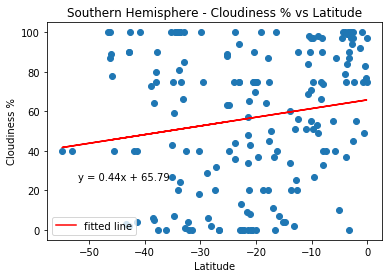

R-squared is 0.028


In [19]:
plt.scatter(southern_df["Lat"], southern_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Southern Hemisphere - Cloudiness % vs Latitude")

slope_s3, intercept_s3, rvalue_s3, pvalue_s3, stderr_s3 = linregress(southern_df["Lat"], southern_df["Cloudiness (%)"])
lin_req_annotate5 = str(f"y = {round(slope_s3,ndigits=2)}x + {round(intercept_s3,ndigits=2)}")
plt.plot(southern_df["Lat"], intercept_s3 + slope_s3*southern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate5, (-52,25))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_s3**2,ndigits = 3)}')

In [ ]:
# The slope on both northern and southern hemisphere are similar, there seems to be a positive slope but that can also be attributed to there being more points in the northern hemisphere. 
# In reality the cloudiness of a city doesn't have much of a correlation compared to the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

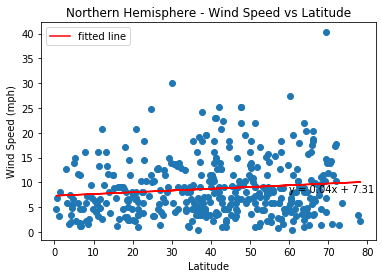

R-squared is 0.014


In [20]:
plt.scatter(northern_df["Lat"], northern_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs Latitude")

slope_n4, intercept_n4, rvalue_n4, pvalue_n4, stderr_n4 = linregress(northern_df["Lat"], northern_df["Wind Speed (mph)"])
lin_req_annotate6 = str(f"y = {round(slope_n4,ndigits=2)}x + {round(intercept_n4,ndigits=2)}")
plt.plot(northern_df["Lat"], intercept_n4 + slope_n4*northern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate6, (60,8))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_n4**2,ndigits = 3)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

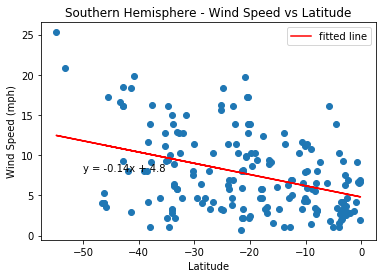

R-squared is 0.144


In [21]:
plt.scatter(southern_df["Lat"], southern_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs Latitude")

slope_s4, intercept_s4, rvalue_s4, pvalue_s4, stderr_s4 = linregress(southern_df["Lat"], southern_df["Wind Speed (mph)"])
lin_req_annotate7 = str(f"y = {round(slope_s4,ndigits=2)}x + {round(intercept_s4,ndigits=2)}")
plt.plot(southern_df["Lat"], intercept_s4 + slope_s4*southern_df["Lat"], 'r', label='fitted line')
plt.annotate(lin_req_annotate7, (-50,8))
plt.legend()
plt.show()
print(f'R-squared is {round(rvalue_s4**2,ndigits = 3)}')

In [ ]:
# In the southern hemisphere there is a tendency for wind speeds to be lower the closer it gets to the equation.
# That statement doesn't hold true for the northern hemisphere. There doesn't seem to be a trend for wind speed in the northern hemisphere. 